<a href="https://colab.research.google.com/github/lijingwang/DataScienceForGeosciences/blob/main/hw2/Homework2_extreme_value_analysis_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science for the Geosciences, 2022
       
Author: Lijing Wang (lijing52@stanford.edu)


---


In [1]:
## Clone data from our GitHub repository
! git clone https://github.com/lijingwang/DataScienceForGeosciences.git

Cloning into 'DataScienceForGeosciences'...
remote: Enumerating objects: 630, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 630 (delta 3), reused 5 (delta 1), pack-reused 615
Receiving objects: 100% (630/630), 169.91 MiB | 14.55 MiB/s, done.
Resolving deltas: 100% (323/323), done.
Checking out files: 100% (136/136), done.


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.linear_model import LinearRegression
import pandas as pd
from statsmodels.graphics.gofplots import qqplot
import warnings
warnings.filterwarnings("ignore")
plt.rcParams.update({'font.size': 18})

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load Swiss precipitation dataset

Here we have 1864-2020 monthly precipitation values for 3 stations: 
- Zürich / Fluntern: North-eastern plateau
- Engelberg: Central Alpine north slope
- Genève / Cointrin: 	Western plateau

![Station.png](https://drive.google.com/uc?export=view&id=1HKezJ61fAWL_hJxKvzQG49mS_45xO7Yi)

In [3]:
# load swiss rainfall dataset 
zurich = pd.read_csv('/content/DataScienceForGeosciences/hw2/homog_mo_SMA.txt',
                           delim_whitespace=True, header=None, index_col = False,
                           skiprows=30, names = ['Year','Month','Temp','Precipitation'],encoding='unicode_escape')
engelberg = pd.read_csv('/content/DataScienceForGeosciences/hw2/homog_mo_ENG.txt',
                           delim_whitespace=True, header=None, index_col = False,
                           skiprows=28, names = ['Year','Month','Temp','Precipitation'],encoding='unicode_escape')
geneva = pd.read_csv('/content/DataScienceForGeosciences/hw2/homog_mo_GVE.txt',
                           delim_whitespace=True, header=None, index_col = False,
                           skiprows=28, names = ['Year','Month','Temp','Precipitation'],encoding='unicode_escape')

5 heaviest precipitations:

In [4]:
# Zurich
zurich.sort_values("Precipitation", inplace = False, ascending=False).head()

,Year,Month,Temp,Precipitation
147,1876,6,15.5,359.2
1622,1999,5,14.9,287.0
1552,1993,7,16.7,284.9
1337,1975,8,17.3,281.1
1271,1970,2,0.4,265.6


In [5]:
# Engelberg
engelberg.sort_values("Precipitation", inplace = False, ascending=False).head()

,Year,Month,Temp,Precipitation
1699,2005,8,12.7,391.6
319,1890,8,12.6,384.2
1806,2014,7,14.7,382.8
100,1872,5,8.2,337.7
330,1891,7,12.7,336.5


In [6]:
# Geneva
geneva.sort_values("Precipitation", inplace = False, ascending=False).head()

,Year,Month,Temp,Precipitation
1556,1993,9,13.8,318.1
393,1896,10,7.9,297.1
1666,2002,11,7.5,295.3
309,1889,10,8.4,287.7
1646,2001,3,8.8,282.1


# Exploratory data analysis and visualization

## Time series and Times series of peaks (> 150mm)

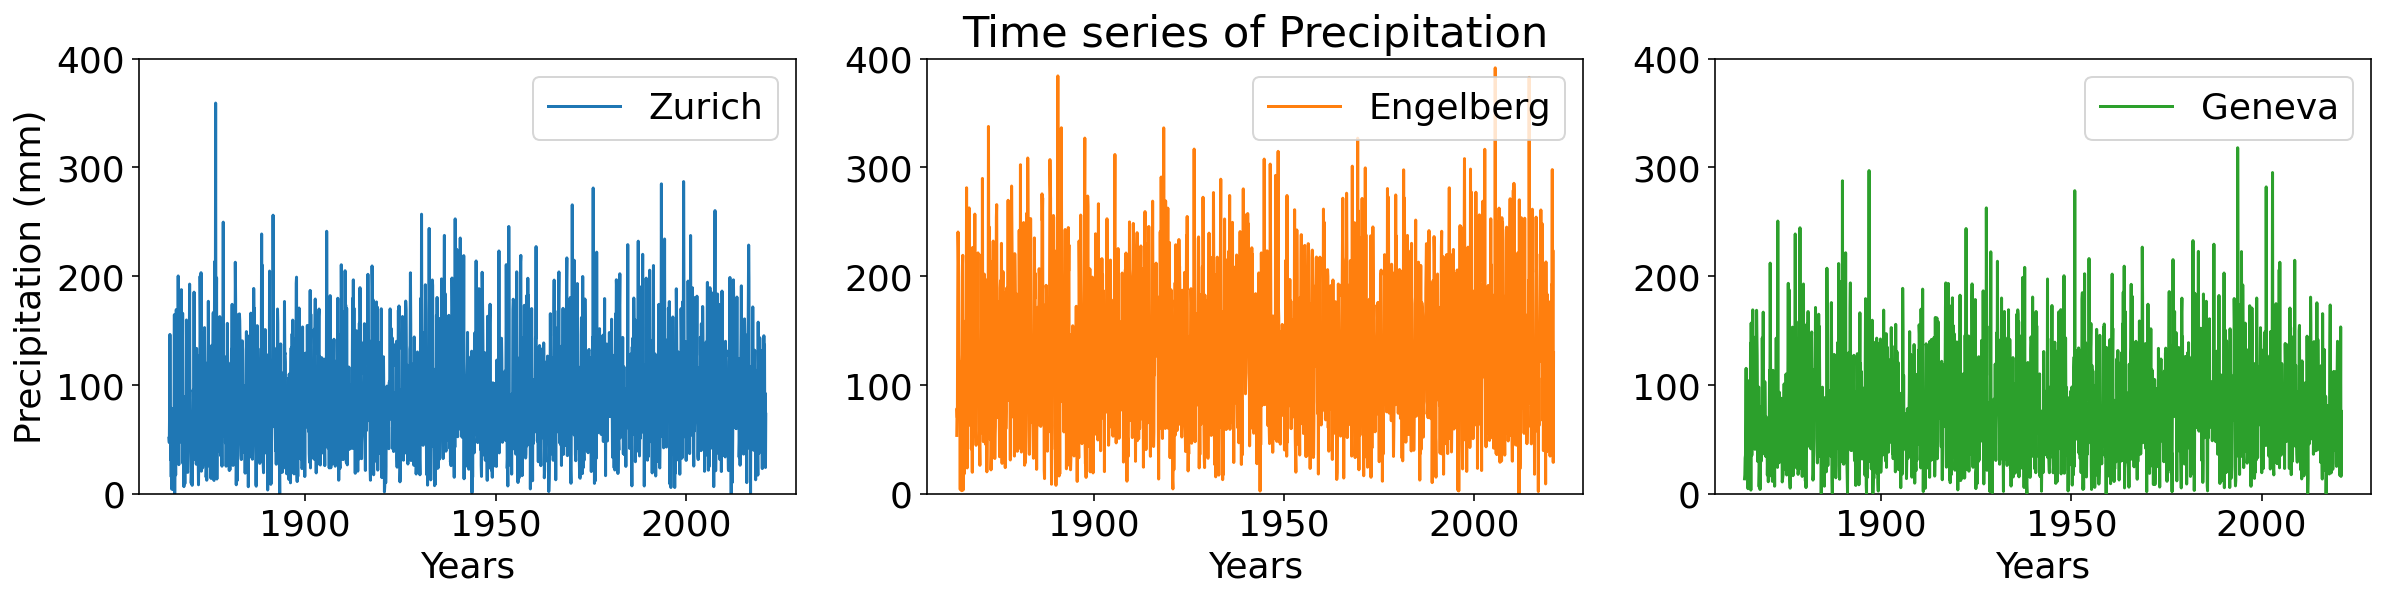

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize = (20,4))
fig.suptitle('')
ax1.plot(zurich['Year']+(zurich['Month']-0.5)/12,zurich['Precipitation'],label = 'Zurich',zorder = 2,color = 'C0')
ax1.legend()
ax1.set_ylim(0,400)
ax1.set_ylabel('Precipitation (mm)')
ax1.set_xlabel('Years')

ax2.plot(engelberg['Year']+(engelberg['Month']-0.5)/12,engelberg['Precipitation'],label = 'Engelberg',zorder = 1,color = 'C1')
ax2.legend()
ax2.set_ylim(0,400)
ax2.set_title('Time series of Precipitation')
ax2.set_xlabel('Years')

ax3.plot(geneva['Year']+(geneva['Month']-0.5)/12,geneva['Precipitation'],label = 'Geneva',zorder = 3, color = 'C2')
ax3.legend()
ax3.set_ylim(0,400)
ax3.set_xlabel('Years')

plt.show()


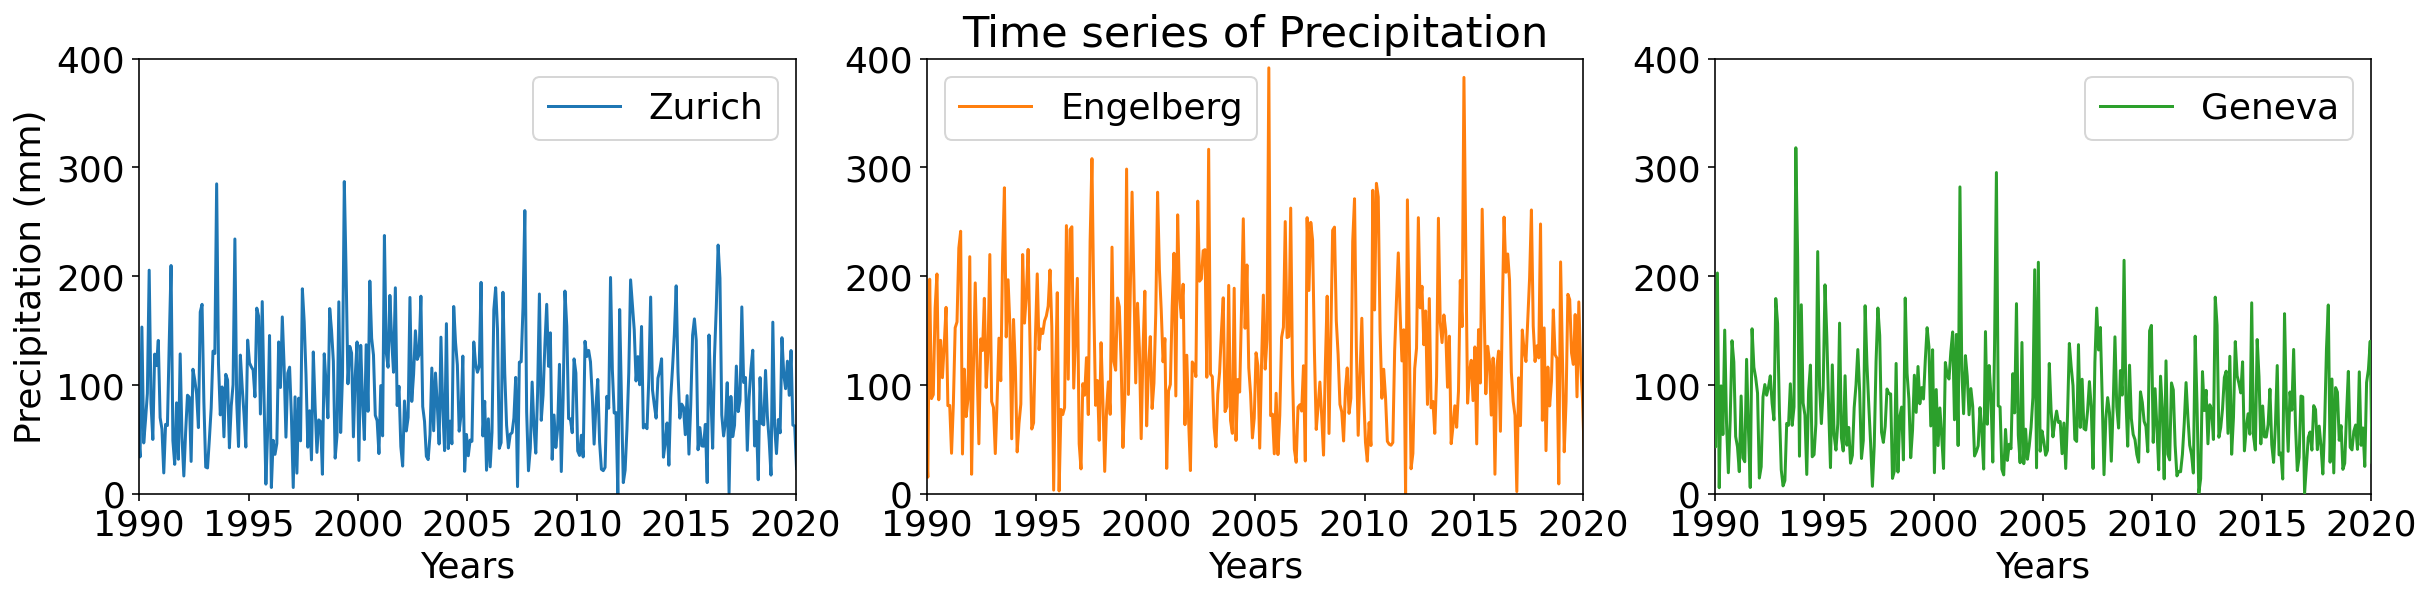

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize = (20,4))
fig.suptitle('')
ax1.plot(zurich['Year']+(zurich['Month']-0.5)/12,zurich['Precipitation'],label = 'Zurich',zorder = 2,color = 'C0')
ax1.legend()
ax1.set_ylim(0,400)
ax1.set_xlim(1990,2020)
ax1.set_ylabel('Precipitation (mm)')
ax1.set_xlabel('Years')

ax2.plot(engelberg['Year']+(engelberg['Month']-0.5)/12,engelberg['Precipitation'],label = 'Engelberg',zorder = 1,color = 'C1')
ax2.legend()
ax2.set_ylim(0,400)
ax2.set_xlim(1990,2020)
ax2.set_title('Time series of Precipitation')
ax2.set_xlabel('Years')

ax3.plot(geneva['Year']+(geneva['Month']-0.5)/12,geneva['Precipitation'],label = 'Geneva',zorder = 3, color = 'C2')
ax3.legend()
ax3.set_ylim(0,400)
ax3.set_xlim(1990,2020)
ax3.set_xlabel('Years')

plt.show()


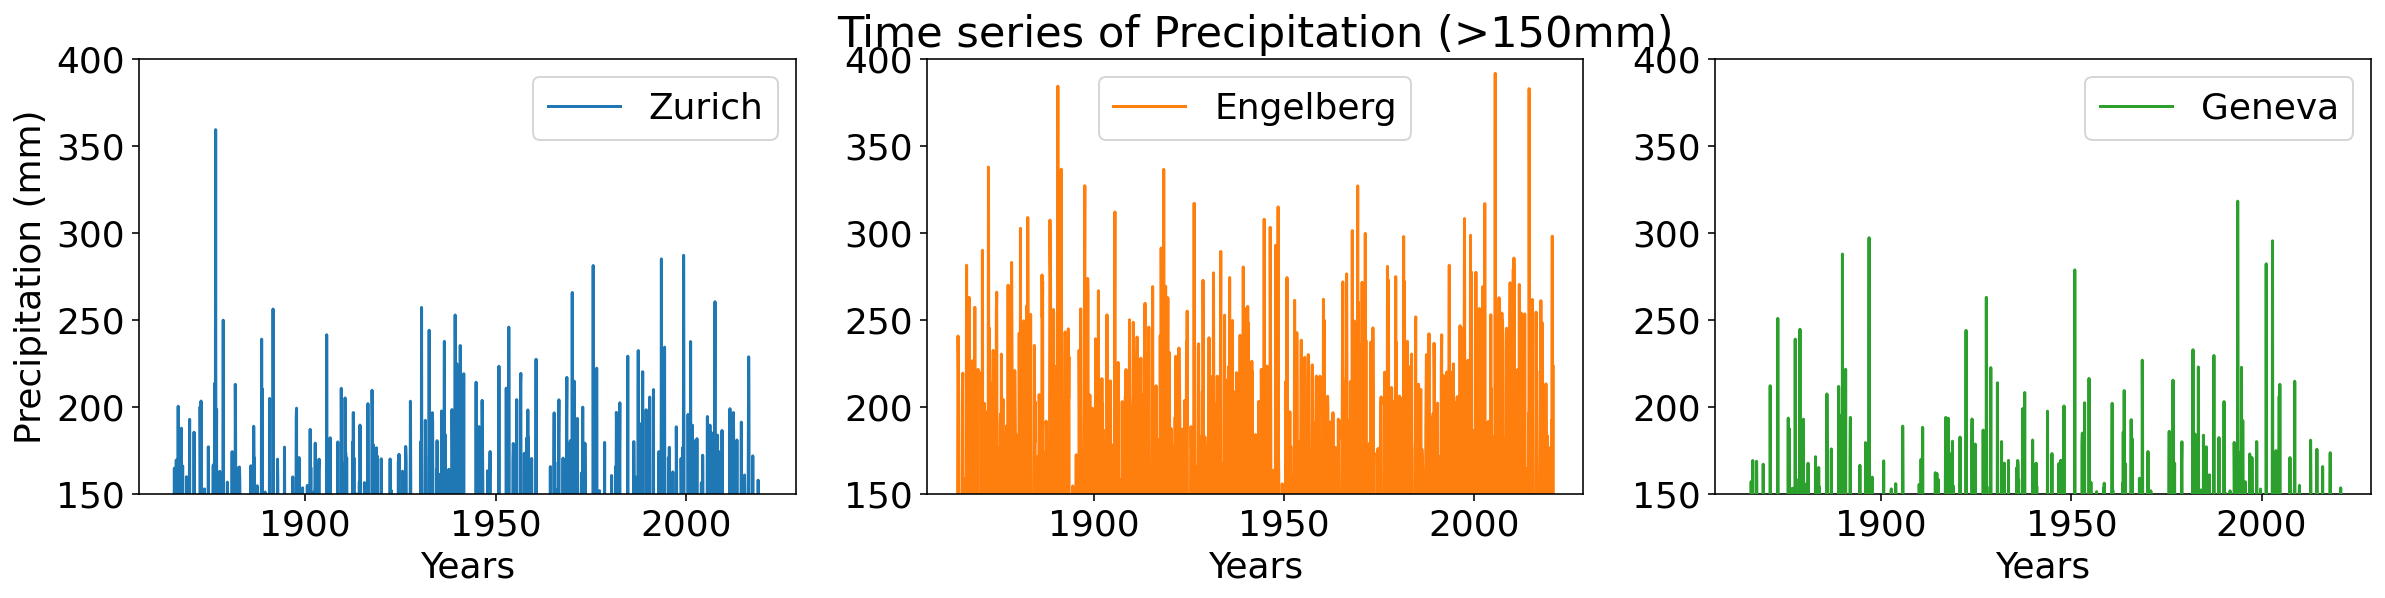

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize = (20,4))
fig.suptitle('')
ax1.plot(zurich['Year']+(zurich['Month']-0.5)/12,zurich['Precipitation'],label = 'Zurich',zorder = 2,color = 'C0')
ax1.legend()
ax1.set_ylim(150,400)
ax1.set_ylabel('Precipitation (mm)')
ax1.set_xlabel('Years')

ax2.plot(engelberg['Year']+(engelberg['Month']-0.5)/12,engelberg['Precipitation'],label = 'Engelberg',zorder = 1,color = 'C1')
ax2.legend()
ax2.set_ylim(150,400)
ax2.set_title('Time series of Precipitation (>150mm)')
ax2.set_xlabel('Years')

ax3.plot(geneva['Year']+(geneva['Month']-0.5)/12,geneva['Precipitation'],label = 'Geneva',zorder = 3, color = 'C2')
ax3.legend()
ax3.set_ylim(150,400)
ax3.set_xlabel('Years')

plt.show()

Text(0.5, 1.0, 'Histogram of precipitation')

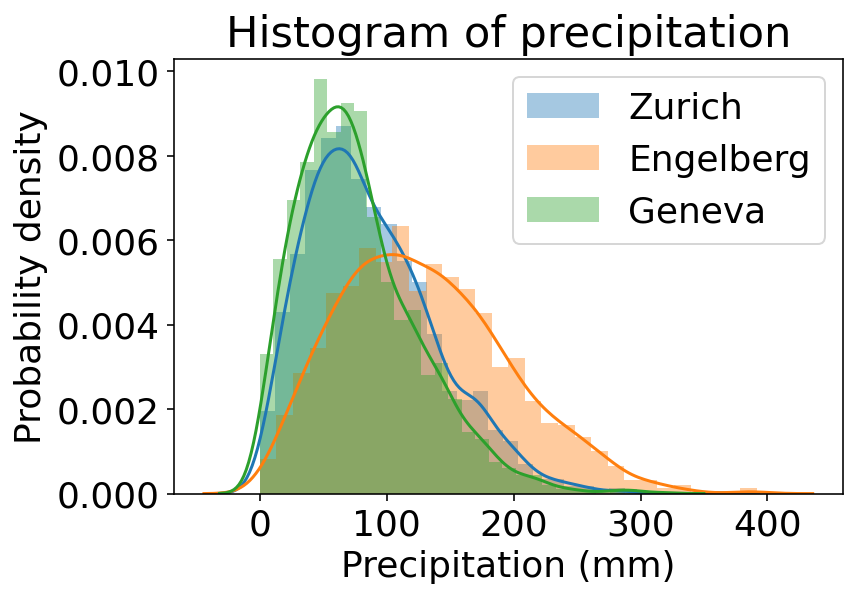

In [10]:
import seaborn as sns
sns.distplot(zurich['Precipitation'],label = 'Zurich',bins = 30)
sns.distplot(engelberg['Precipitation'],label = 'Engelberg',bins = 30)
sns.distplot(geneva['Precipitation'],label = 'Geneva',bins = 30)
plt.xlabel('Precipitation (mm)')
plt.ylabel('Probability density')
plt.legend()
plt.title('Histogram of precipitation')

## Pareto QQ Plot

In [11]:
def pareto_quantile(data,name, color = 'C0', axes = ax1):    
    data = np.sort(data)[::-1]
    n = len(data)
    axes.scatter(-np.log10((np.arange(n)+1)/(n+1)),np.log10(data),s = 10, color = color,label = name)
    axes.set_xlabel('$-\log(i/(n+1))$')
    axes.set_ylabel('$\log(x_i^*)$')
    axes.legend()

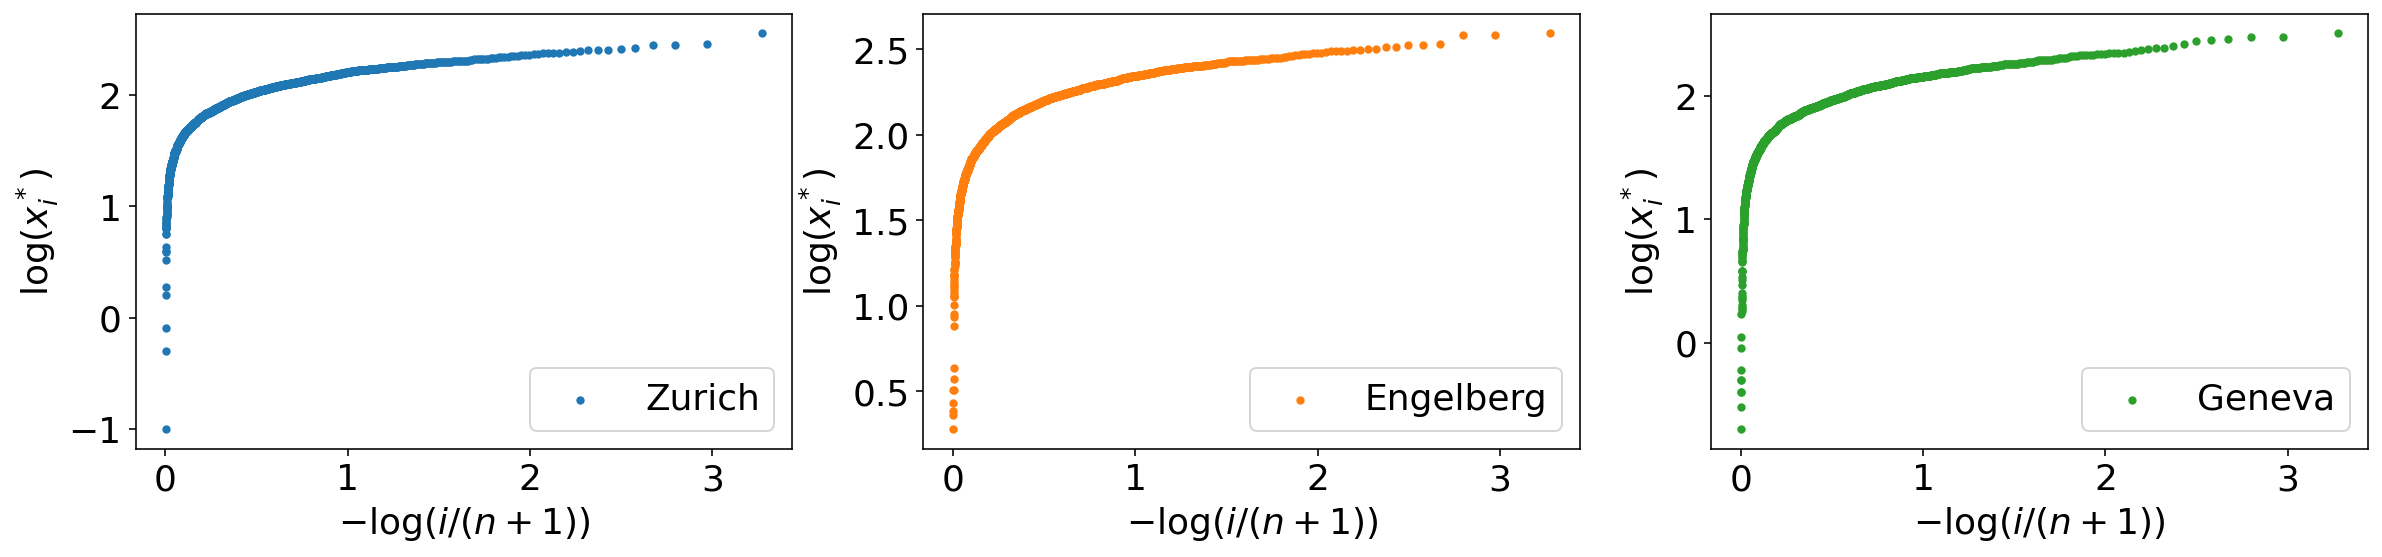

In [12]:
## Pareto Quantile Plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize = (20,4))
name = 'Zurich'
data = zurich['Precipitation']
color = 'C0'
pareto_quantile(data, name, color = color, axes =ax1)
name = 'Engelberg'
data = engelberg['Precipitation']
color = 'C1'
pareto_quantile(data, name, color = color, axes =ax2)
name = 'Geneva'
data = geneva['Precipitation']
color = 'C2'
pareto_quantile(data, name, color = color, axes =ax3)

# Return period and return plot

## Empirical Return Period and Return Plot

In [13]:
def empirical_return_period_return_level(data, name, color = 'C0', axes = ax1):
    data = np.sort(data)
    empirical_level = np.unique(data)
    empirical_return_period = np.zeros(len(empirical_level))
    for i, level in enumerate(empirical_level):
        empirical_return_period[i] = len(data)/np.sum(data>=level)

    ## Empirical return period v.s. return level plot
    axes.plot(empirical_return_period/12,empirical_level,'.',color = color, label = name)
    axes.set_xlabel('Return Period: Years')
    axes.set_ylabel('Return Level: Precipitation(mm)')
    axes.set_title('Empirical return period v.s. return level plot')
    axes.set_ylim(-10,420)
    axes.legend()

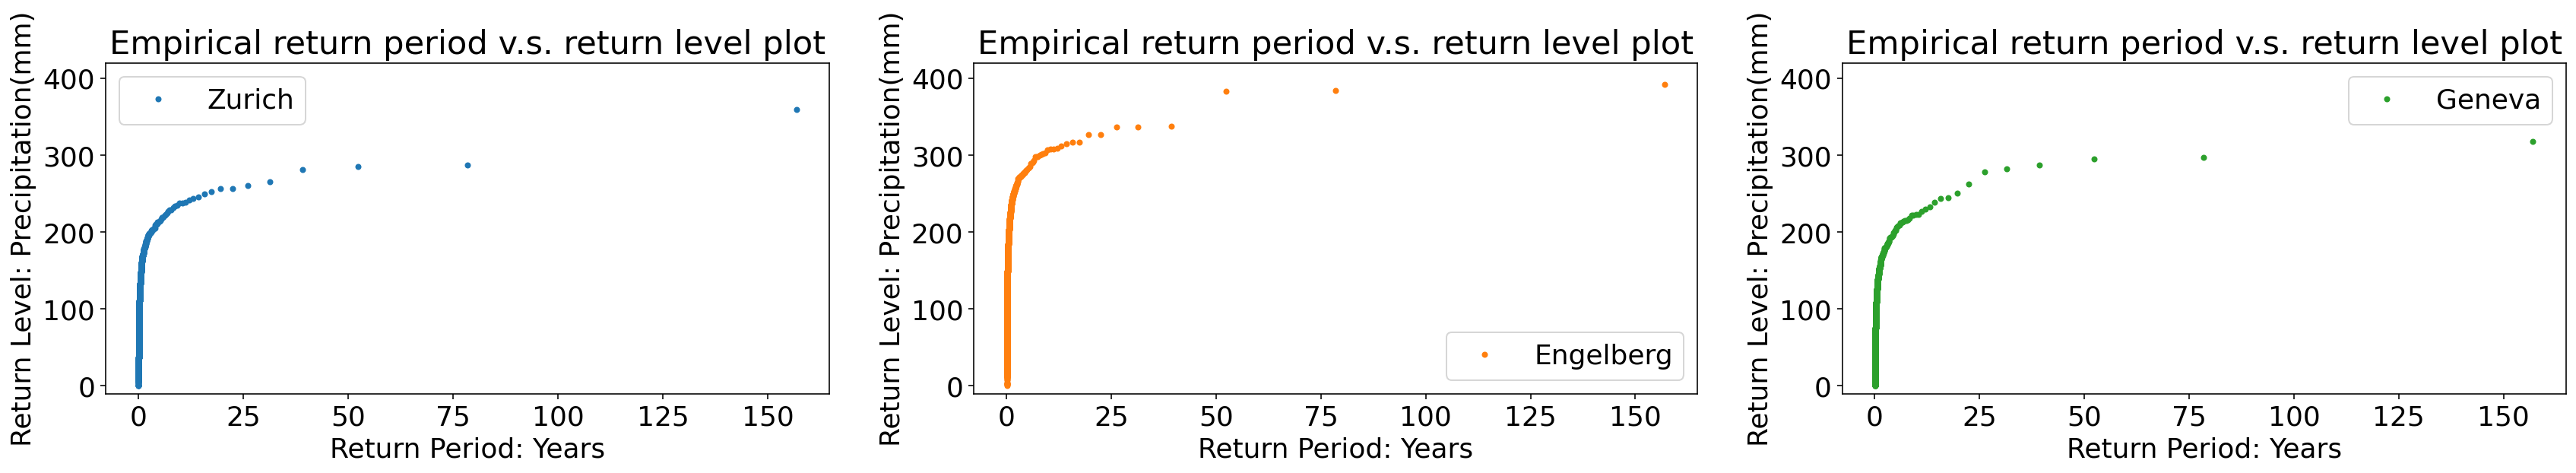

In [14]:
## Empirical return period v.s. return level plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize = (29,4))
name = 'Zurich'
data = zurich['Precipitation']
color = 'C0'
empirical_return_period_return_level(data, name, color = color, axes =ax1)
name = 'Engelberg'
data = engelberg['Precipitation']
color = 'C1'
empirical_return_period_return_level(data, name, color = color, axes =ax2)
name = 'Geneva'
data = geneva['Precipitation']
color = 'C2'
empirical_return_period_return_level(data, name, color = color, axes =ax3)

In [15]:
def empirical_return_period_return_level_log(data, name, color = 'C0', axes = ax1, return_period = 10):

    # input: return_period ~ years, will print the return level given this return period, default is 10 years. 
    data = np.sort(data)
    empirical_level = np.unique(data)
    empirical_return_period = np.zeros(len(empirical_level))
    for i, level in enumerate(empirical_level):
        empirical_return_period[i] = len(data)/np.sum(data>=level)

    index = np.argmin(np.abs(empirical_return_period/12-return_period))
    print(str(np.round(empirical_return_period[index]/12,0))+' years return level: '+str(empirical_level[index]))
    
    ## Empirical return period v.s. return level plot
    axes.plot(empirical_return_period/12,empirical_level,'.',color = color, label = name)
    axes.set_xlabel('Return Period: Years')
    axes.set_ylabel('Return Level: Precipitation(mm)')
    axes.vlines(x = return_period,ymin = 0, ymax = 500)
    #axes.set_title('Empirical return period v.s. return level plot, log-scale on T')
    axes.set_xscale('log',basex = 10)
    axes.set_ylim(-10,420)
    axes.legend()

10.0 years return level: 237.4
10.0 years return level: 307.2
10.0 years return level: 222.6


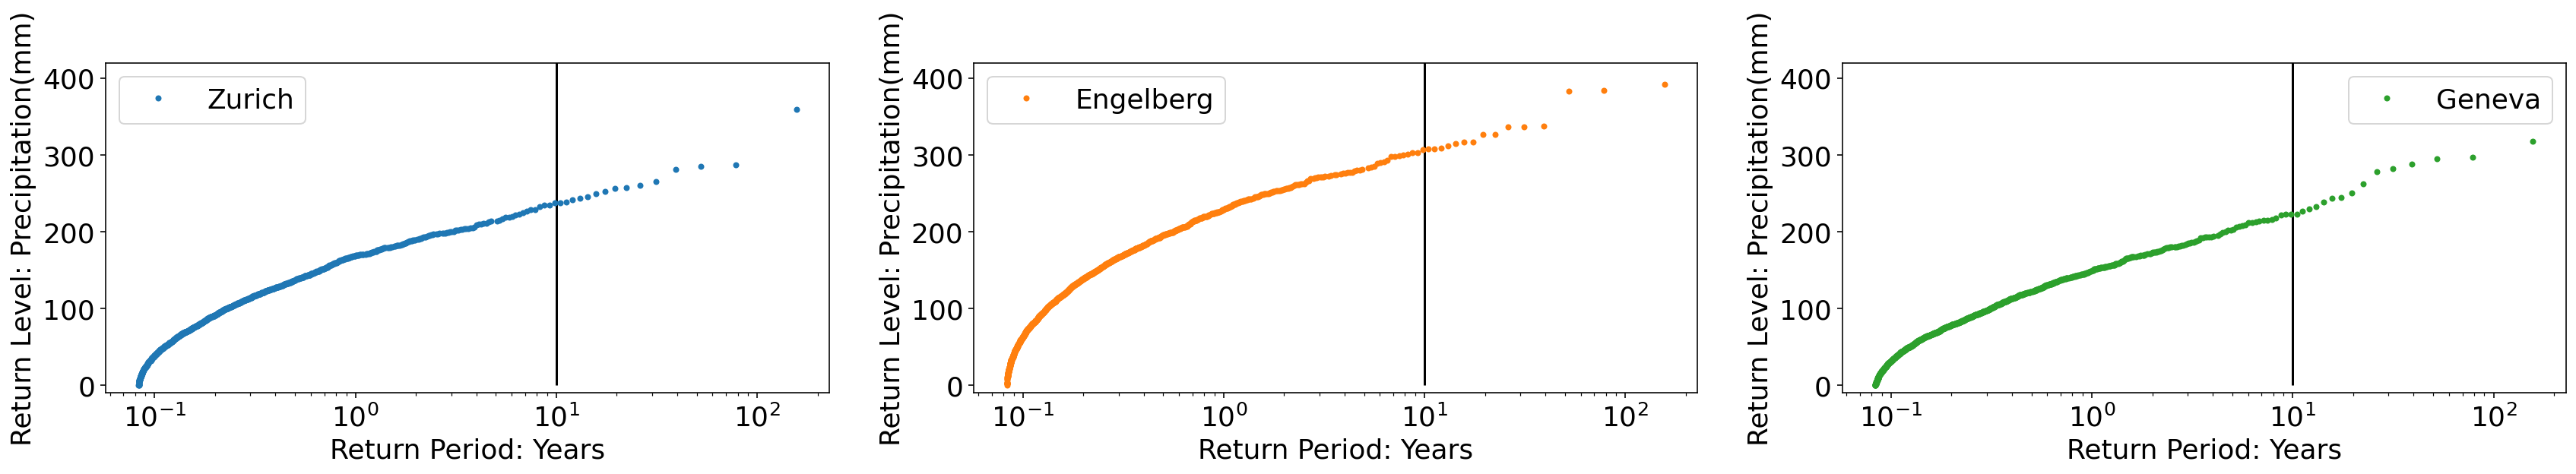

In [16]:
## Empirical return period v.s. return level plot, log scale
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize = (29,4))
name = 'Zurich'
data = zurich['Precipitation']
color = 'C0'
empirical_return_period_return_level_log(data, name, color = color, axes =ax1)
name = 'Engelberg'
data = engelberg['Precipitation']
color = 'C1'
empirical_return_period_return_level_log(data, name, color = color, axes =ax2)
name = 'Geneva'
data = geneva['Precipitation']
color = 'C2'
empirical_return_period_return_level_log(data, name, color = color, axes =ax3)

## Fit GPD and make predictions for different return periods

Fit exceedances > u with GPD distribution, the peak over threshold method: 

In [17]:
from scipy.stats import genpareto
def fit_GPD_distribution(data, name, color = 'C0', axes = ax1,u = 100):
    xi, mu, sigma = genpareto.fit(data[data>u]-u) # fit GPD
    axes.plot(np.linspace(u,600+u,1000),genpareto.pdf(np.linspace(0,600,1000), xi, mu, sigma),label = 'Fitted GPD',linewidth = 3, color = 'C3')
    axes.hist(data[data>u], density  = True, label = 'Exceedances at '+str(name),alpha = 0.8, bins = 30, color = color)
    axes.set_title('Estimated xi: '+str(np.round(xi,3)))
    axes.set_xlabel('Precipitation(mm)')
    axes.set_ylabel('Probability density')
    axes.legend()

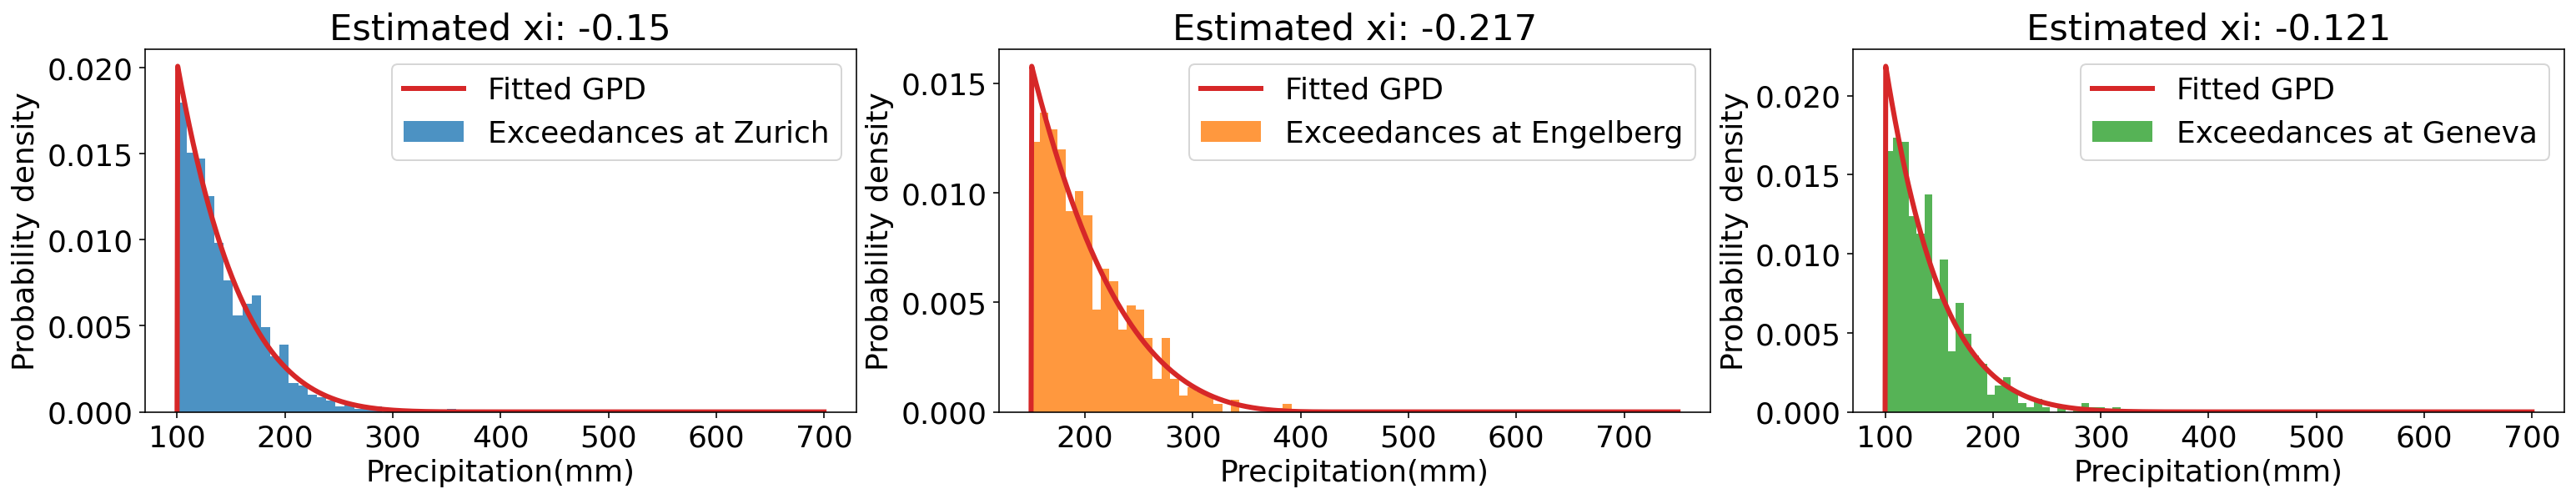

In [18]:
## Fit Eeceedances
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize = (26,4))
name = 'Zurich'
data = zurich['Precipitation']
color = 'C0'
fit_GPD_distribution(data, name, color = color, axes =ax1, u = 100)
name = 'Engelberg'
data = engelberg['Precipitation']
color = 'C1'
fit_GPD_distribution(data, name, color = color, axes =ax2, u = 150)
name = 'Geneva'
data = geneva['Precipitation']
color = 'C2'
fit_GPD_distribution(data, name, color = color, axes =ax3, u = 100)

In [19]:
def return_period_function(return_level_x, u, xi, mu, sigma, data, time_interval  = len(data)):
    ## 1−𝐺𝑃𝐷(𝑦),y = x - u
    one_minus_GPD_y = 1-genpareto.cdf(return_level_x-u,xi,mu,sigma)

    ## Pu = 𝑃(𝑋>𝑢)
    Pu = np.sum(data>u)/time_interval

    ## P(X>x)
    exceedance_prob = one_minus_GPD_y*Pu

    ## T = 1/P(X>x)
    return_period_T = 1/exceedance_prob

    return return_level_x, return_period_T

In [20]:
def fitted_return_level_return_period(data, name, color = 'C0', axes = ax1,u = 100, return_period = 200):

    # input: return_period ~ years, will print the return level given this return period, default is 200 years. 
    data = np.sort(data)
    empirical_level = np.unique(data)
    empirical_return_period = np.zeros(len(empirical_level))
    for i, level in enumerate(empirical_level):
        empirical_return_period[i] = len(data)/np.sum(data>=level)
    
    xi, mu, sigma = genpareto.fit(data[data>u]-u) # fit GPD
    return_level_x, return_period_T = return_period_function(np.arange(u, 500,0.05), u, xi, mu, sigma, data,  time_interval  = len(data))
    
    index = np.argmin(np.abs(return_period_T/12-return_period))
    print(str(np.round(return_period_T[index]/12,0))+' years return level: '+str(np.round(return_level_x[index],3)))
    ## Fitted return period v.s. return level plot, log-scale on T
    axes.plot(empirical_return_period/12,empirical_level,'.',color = color, label = name)
    axes.plot(return_period_T/12,return_level_x, color = 'C3')
    axes.vlines(x = return_period,ymin = 0, ymax = 500)
    axes.set_xscale('log',basex = 10)
    axes.set_xlabel('Return Period: Years')
    axes.set_ylabel('Return Level: Precipitation(mm)')
    axes.set_ylim(-10,500)
    axes.legend()
    #axes.set_title('Empirical return period v.s. return level plot, log-scale on T')

200.0 years return level: 309.95
200.0 years return level: 373.75
200.0 years return level: 302.95


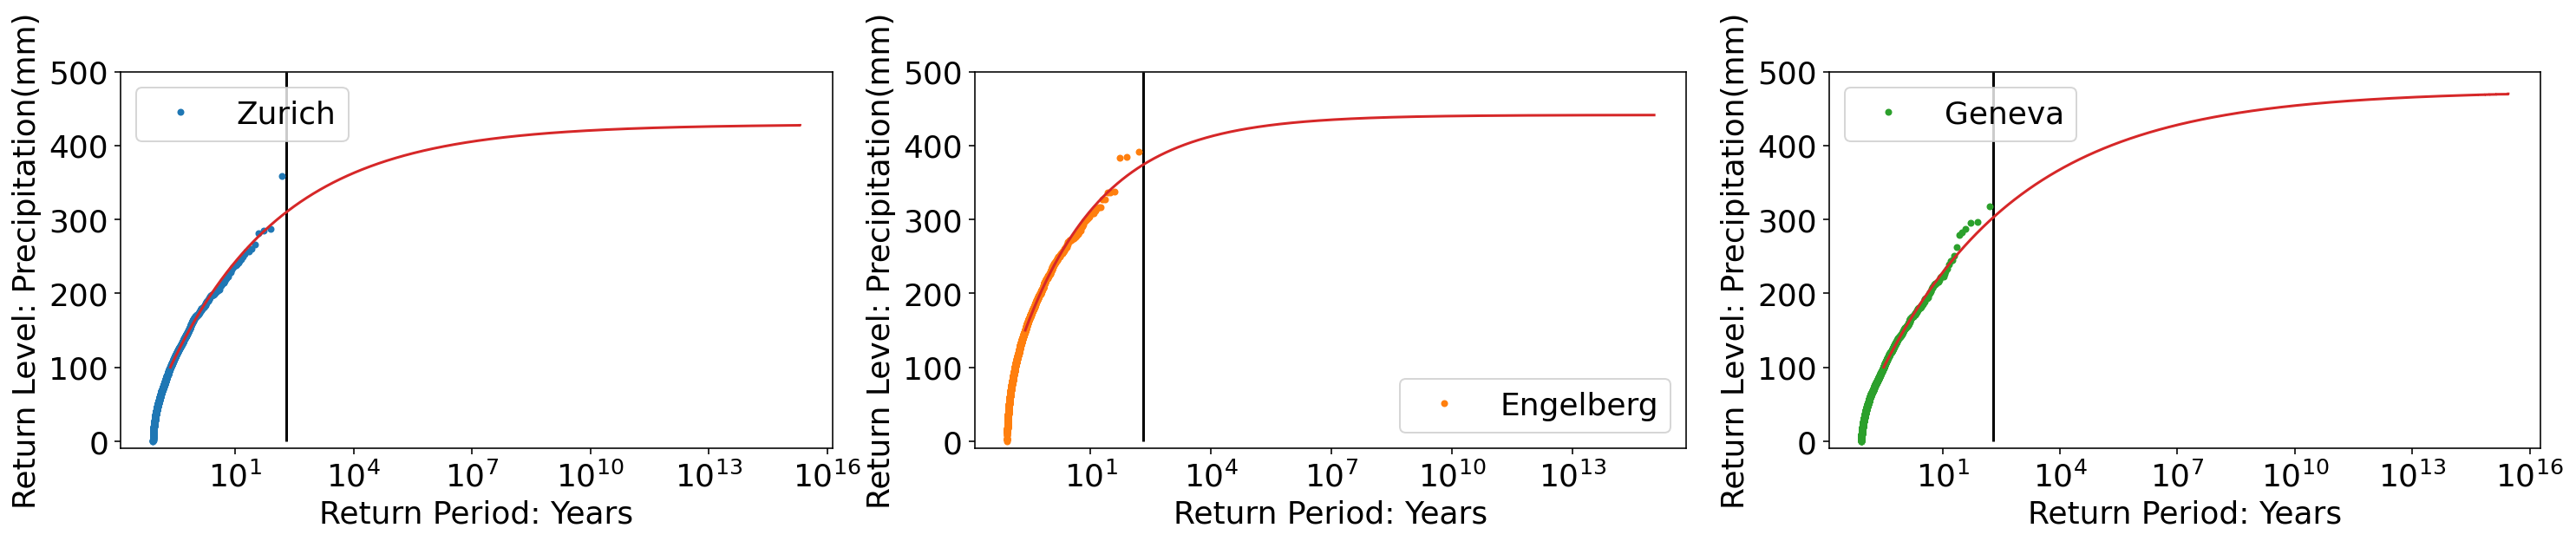

In [21]:
## Fit return period v.s. return level plot, log-scale on T
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize = (25,4))
name = 'Zurich'
data = zurich['Precipitation']
color = 'C0'
fitted_return_level_return_period(data, name, color = color, axes =ax1, u = 100)
name = 'Engelberg'
data = engelberg['Precipitation']
color = 'C1'
fitted_return_level_return_period(data, name, color = color, axes =ax2, u = 150)
name = 'Geneva'
data = geneva['Precipitation']
color = 'C2'
fitted_return_level_return_period(data, name, color = color, axes =ax3, u = 100)

## Compare $\xi$ and return level of a fixed return period 1) before 1950 and 2) after 1950 in Engelberg

Hypothesis: Climate change made extreme precipitation events more likely. 

Reference: 
https://journals.ametsoc.org/view/journals/apme/48/10/2009jamc2179.1.xml 


Text(0.5, 1.0, 'Quantile-Quantile plot: Zurich')

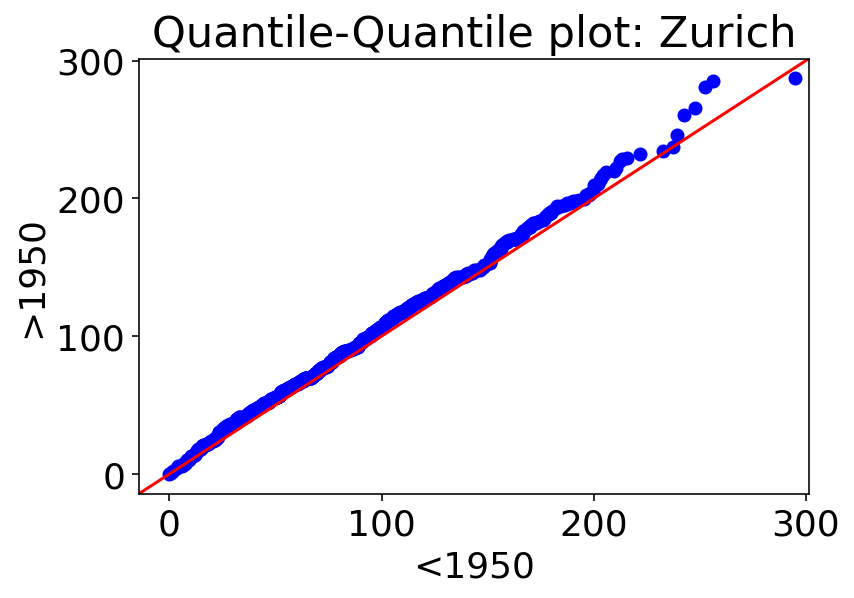

In [22]:
from statsmodels.graphics.gofplots import qqplot_2samples
qqplot_2samples(zurich['Precipitation'][engelberg['Year']>1950],zurich['Precipitation'][engelberg['Year']<1950], line='45')
plt.xlabel('<1950')
plt.ylabel('>1950')
plt.title('Quantile-Quantile plot: Zurich')

Text(0.5, 1.0, 'Quantile-Quantile plot: Engelberg')

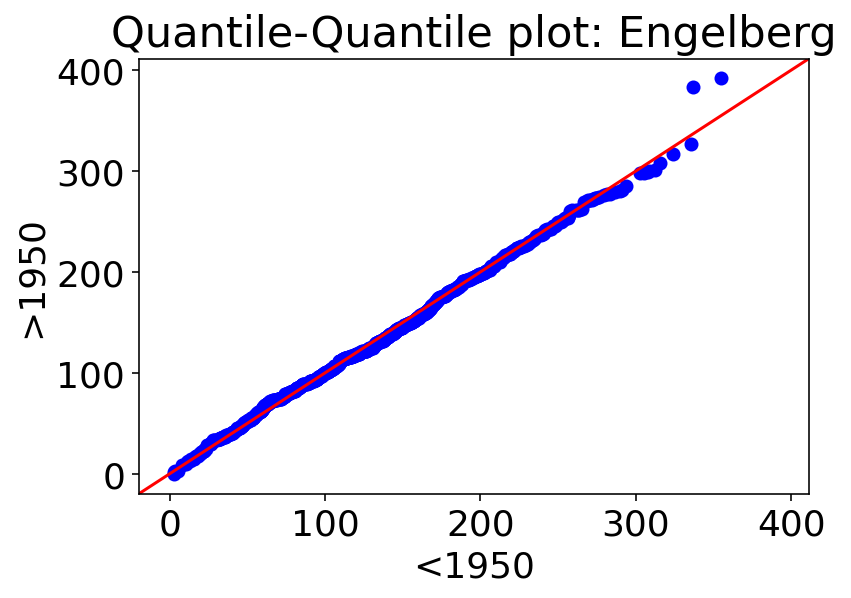

In [23]:
from statsmodels.graphics.gofplots import qqplot_2samples
qqplot_2samples(engelberg['Precipitation'][engelberg['Year']>1950],engelberg['Precipitation'][engelberg['Year']<1950], line='45')
plt.xlabel('<1950')
plt.ylabel('>1950')
plt.title('Quantile-Quantile plot: Engelberg')

Text(0.5, 1.0, 'Quantile-Quantile plot: Geneva')

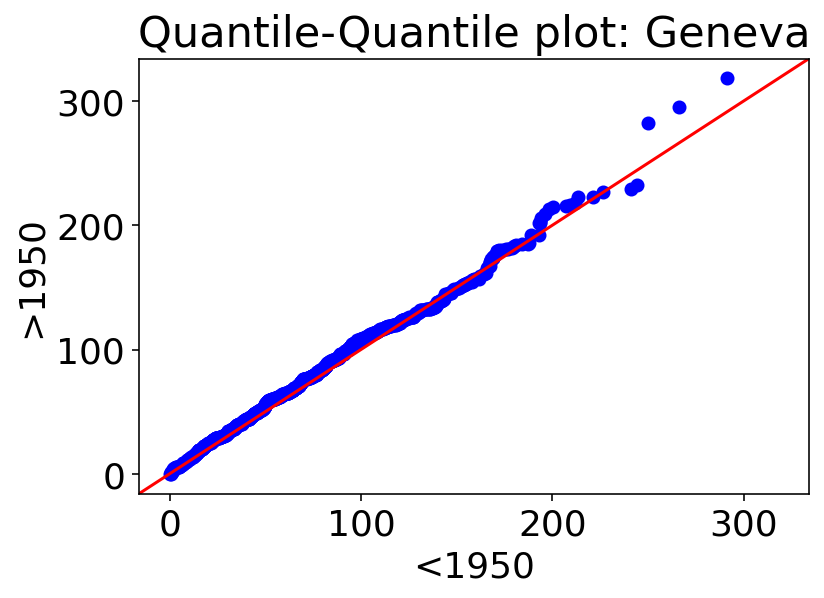

In [24]:
qqplot_2samples(geneva['Precipitation'][geneva['Year']>1950],geneva['Precipitation'][geneva['Year']<1950], line='45')
plt.xlabel('<1950')
plt.ylabel('>1950')
plt.title('Quantile-Quantile plot: Geneva')

200.0 years return level: 369.35
200.0 years return level: 377.9


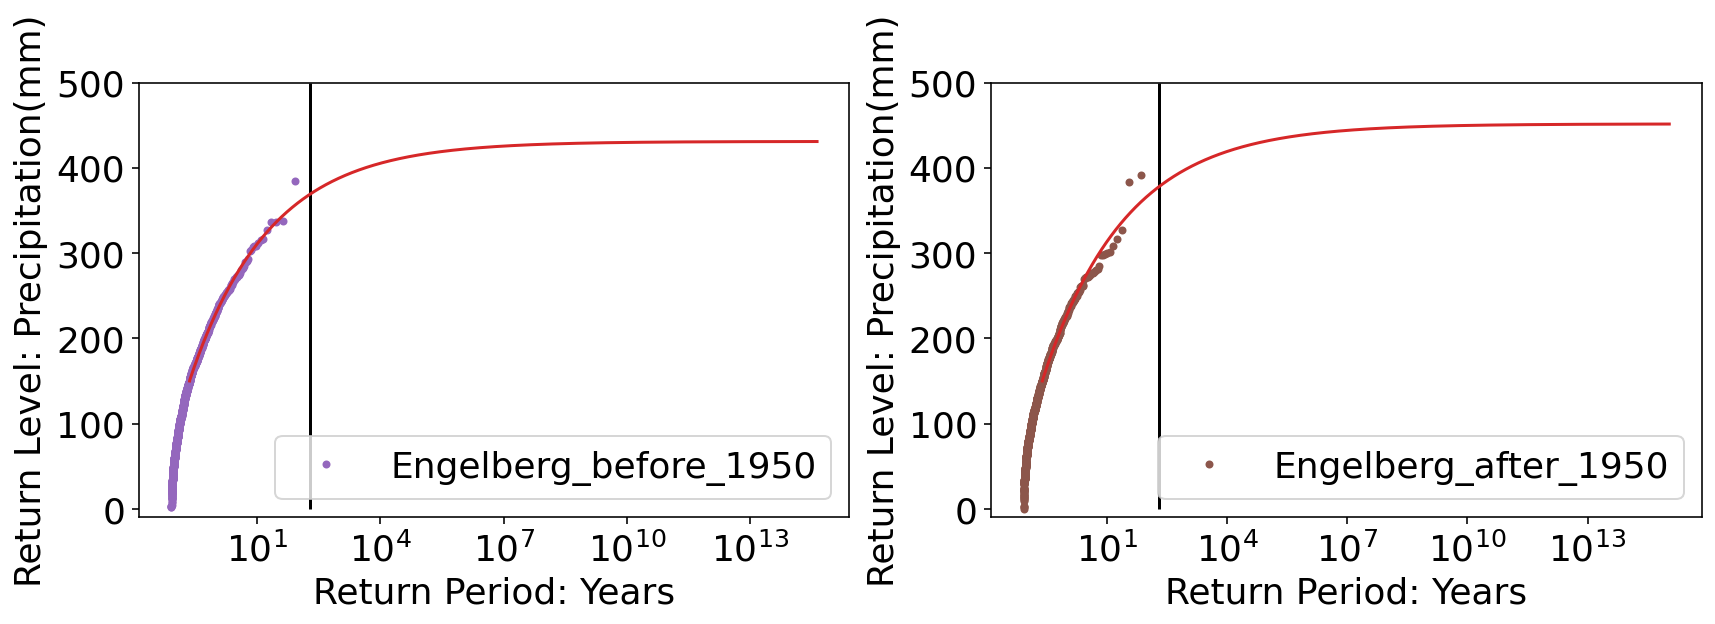

In [25]:
## Fit return period v.s. return level plot, log-scale on T
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (14,4))
name = 'Engelberg_before_1950'
data = engelberg['Precipitation'][engelberg['Year']<1950]
color = 'C4'
fitted_return_level_return_period(data, name, color = color, axes =ax1, u = 150)

name = 'Engelberg_after_1950'
data = engelberg['Precipitation'][engelberg['Year']>1950]
color = 'C5'
fitted_return_level_return_period(data, name, color = color, axes =ax2, u = 150)


10.0 years return level: 310.45
10.0 years return level: 313.4


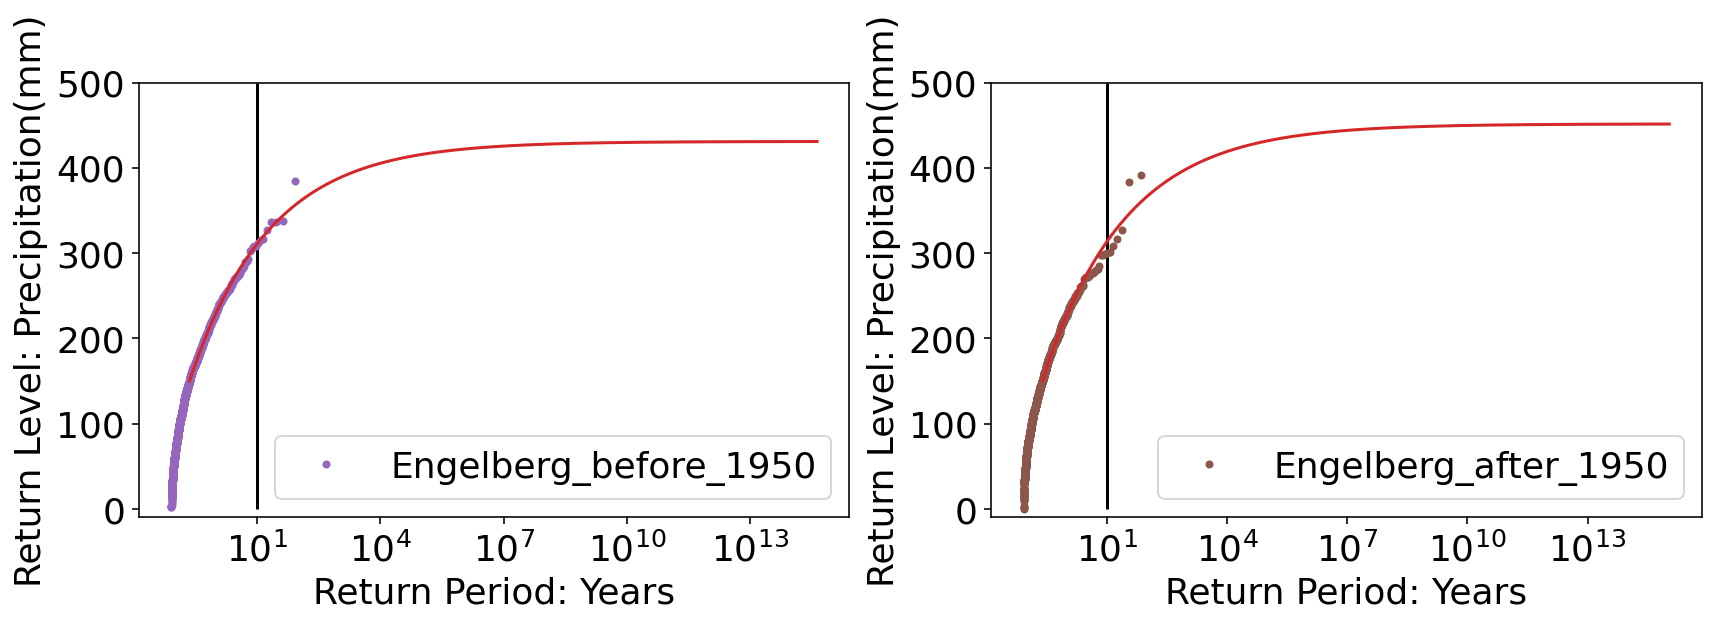

In [26]:
## Fit return period v.s. return level plot, log-scale on T
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (14,4))
name = 'Engelberg_before_1950'
data = engelberg['Precipitation'][engelberg['Year']<1950]
color = 'C4'
fitted_return_level_return_period(data, name, color = color, axes =ax1, u = 150, return_period=10)

name = 'Engelberg_after_1950'
data = engelberg['Precipitation'][engelberg['Year']>1950]
color = 'C5'
fitted_return_level_return_period(data, name, color = color, axes =ax2, u = 150, return_period=10)